# Exploratory Data Ananlysis on Cars Dataset

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as py
import matplotlib.pyplot as plt
sns.set_style("dark")
import matplotlib.colors as colors
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Functions

In [2]:
def missing_values(dataframe):
    null_counts = dataframe.isnull().sum()
    mean_missing = dataframe.isnull().mean()*100
    missing_val = pd.DataFrame({'Count' : null_counts[null_counts > 0] , 'Percentage Missing(%)' : mean_missing[mean_missing > 0] })
    missing_val.sort_values(by = 'Count' , inplace=True)
    missing_val.reset_index(inplace=True)
    missing_val.columns = ['Features' , 'Count' , 'Percentage Missing(%)' ]
    return missing_val

In [3]:
def groupedData(data,col,againstCol,method):
    agecat=data.groupby(col)
    dict_data={x:None for x in agecat.groups}
    for grp, gata in agecat:
        if method=='mode':
            dict_data[grp]=gata[againstCol].mode()[0]
        elif method=='mean':
            dict_data[grp]=gata[againstCol].mean()
    return dict_data

In [4]:
def bar_number(ax,xytest,rotation):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = xytest, textcoords = 'offset points',rotation=rotation)

### Importing Data

In [5]:
data=pd.read_csv('New_cars_cleaned.csv')

In [6]:
data.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,255,45.0,V,20.0
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0


### Data description

New_cars_cleaned.csv contains 56 Columns and 32316 rows 

### Feature description

Check for feature description text file

## Missing Values

In [7]:
missing_values(data);

### MSRP - Selling price in dollars Count plot

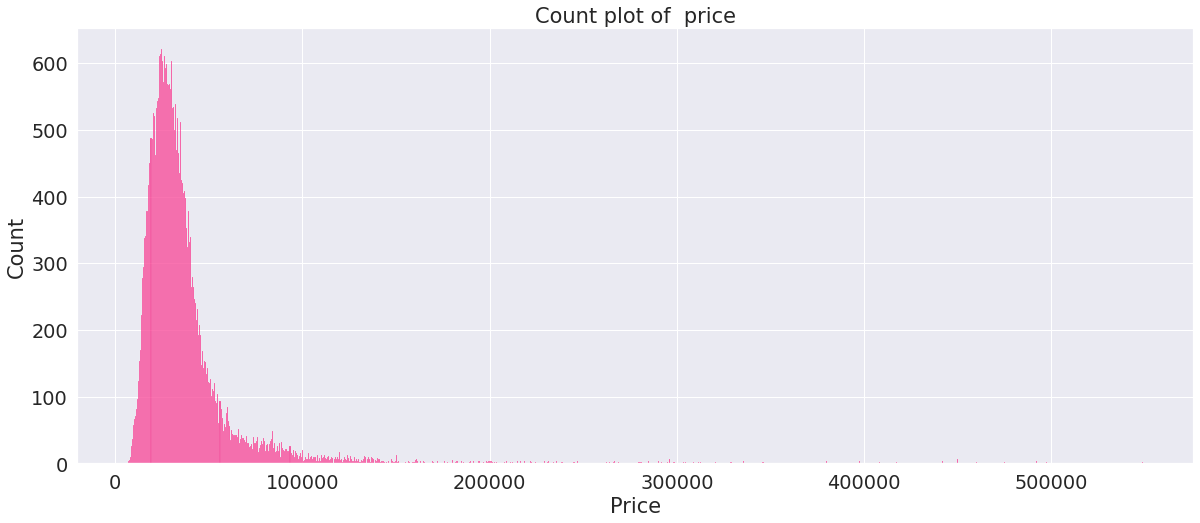

In [8]:
plt.figure(figsize=[20,8]);
sns.set(font_scale=1.75);
sns.histplot(x=data['MSRP'].dropna(),color='#f72585',bins=1000);
plt.xlabel('Price');
plt.title('Count plot of  price');

Observations:-
 
Maximum numbers of cars price ranges to 0 to 100000

Car prices goesup to  500k dollars

### Boxplot between Engine type and price

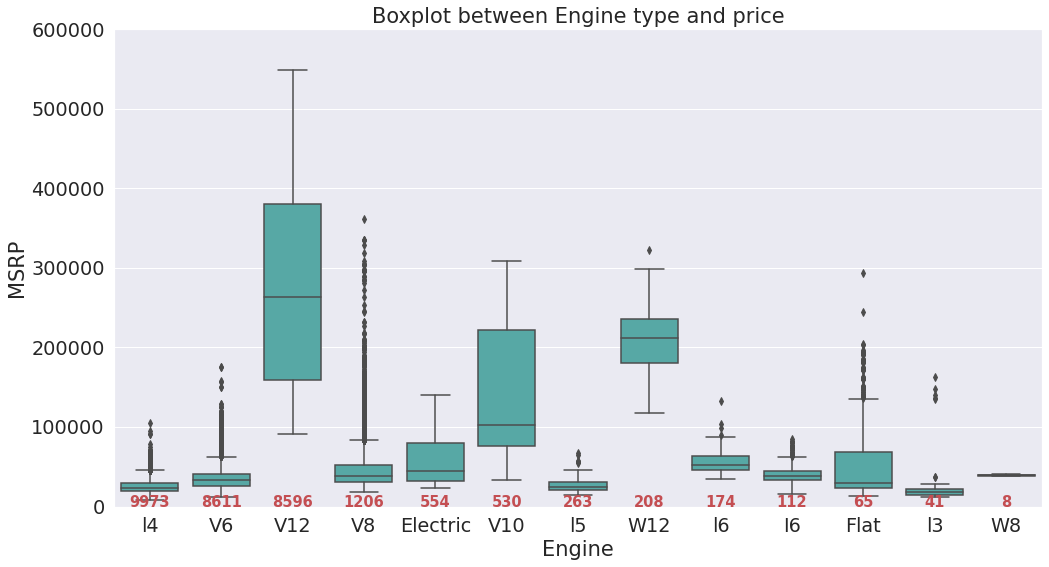

In [9]:
sns.set(font_scale=1.75);
plt.figure(figsize=[15,8])
ax=sns.boxplot(x='Engine' , y='MSRP',data=data,color='#4ab5b2')
plt.tight_layout()
plt.title('Boxplot between Engine type and price')
plt.ylim(-1000,600000)
means = data.groupby(['Engine'])['MSRP'].mean().values
nobs = data['Engine'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]

pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick],  -500, nobs[tick],
    horizontalalignment='center', size='x-small', color='r', weight='semibold')




Observations:-
 
The mean value is plotted in the graph

V12 V10 W12 engines are on expensive side

I4 V6 I5 I3 W8 engine are the cheapest engine 

### Comparison between Category and price on Drive train and Transmission

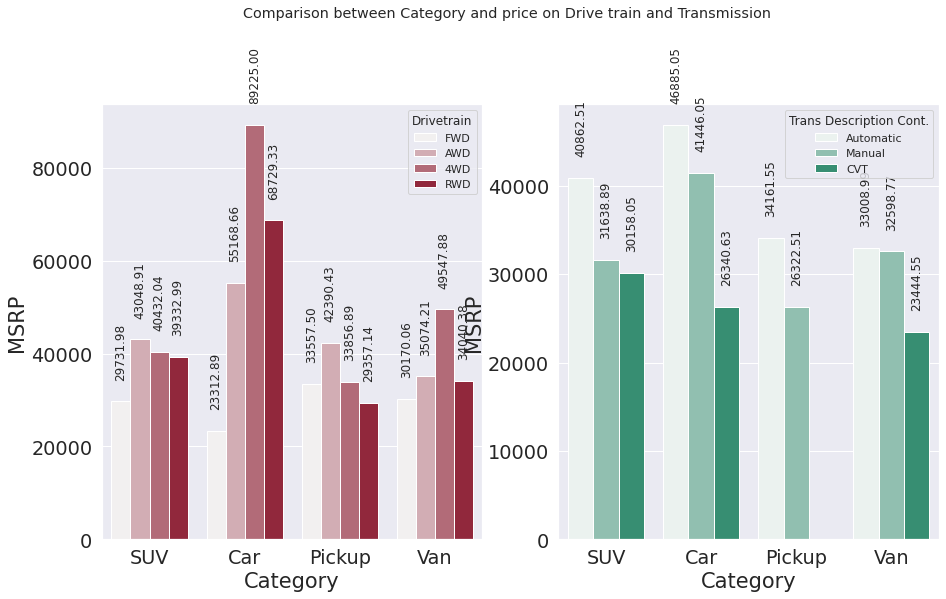

In [10]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,8))
sns.set(font_scale=1)
ax1=sns.barplot(ax=ax[0],y=data['MSRP'].dropna(),x=data['Category'],color='#A31631',hue=data['Drivetrain'],ci=None)
bar_number(ax1,(0, 50),90)

ax2=sns.barplot(ax=ax[1],y=data['MSRP'].dropna(),x=data['Category'],color='#299C77',hue=data['Trans Description Cont.'],ci=None)
bar_number(ax2,(0, 50),90)
plt.xlabel('Category',)
fig.suptitle('Comparison between Category and price on Drive train and Transmission',y=1.05);


Observations:-
 
The max price of Car in 4wd Drivetrain is 89255

The max price of Car in Automatic Transmission 46855

Count of Car with 4WD Drivetrain is greatest in Category 

Count of Car with Automatic Transmission is greatest in Category 


### Comparision between Horsepower and Price

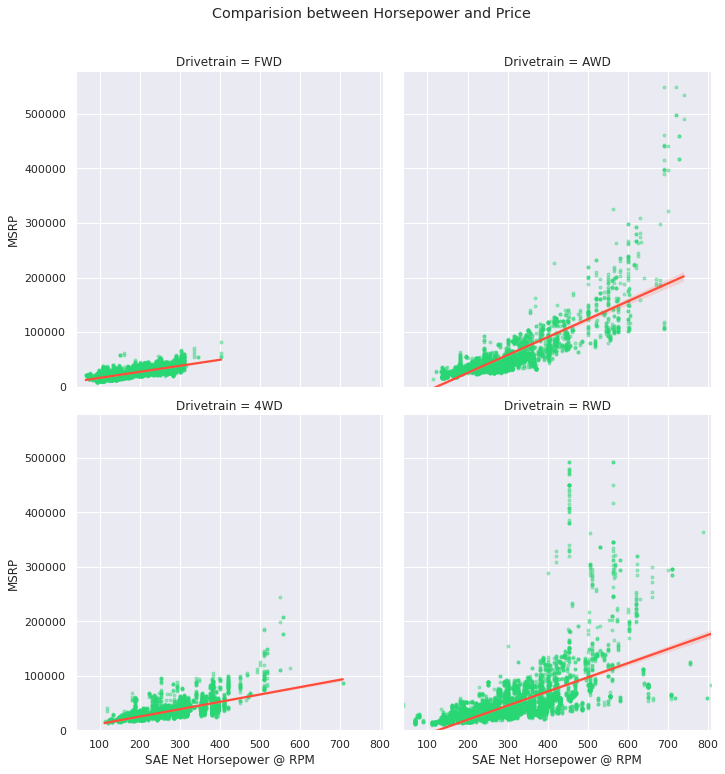

In [11]:
sns.set(font_scale=1)
lm = sns.lmplot(x = 'SAE Net Horsepower @ RPM' , 
           y = 'MSRP' ,
           markers= '.',
           col = 'Drivetrain',
           col_wrap=2,
           palette='Blues',
           scatter_kws={'alpha':0.4, 'color':'#29d674'},
           line_kws={'color': '#FF4D3A'},
           data=data)
lm.set(ylim=(0, None))
lm.fig.suptitle('Comparision between Horsepower and Price',y=1.05);

Observations:-
 
We can see the trend of the increase in price as the net horsepower of car increase irrespective of drivetrain

Most amount of car have RWD with high net horsepower which also have greater in price

Significaiant  amount of car have AWD with high net horsepower which also have greater in price 

### Comparision between Fuel Economy and Price

<Figure size 720x576 with 0 Axes>

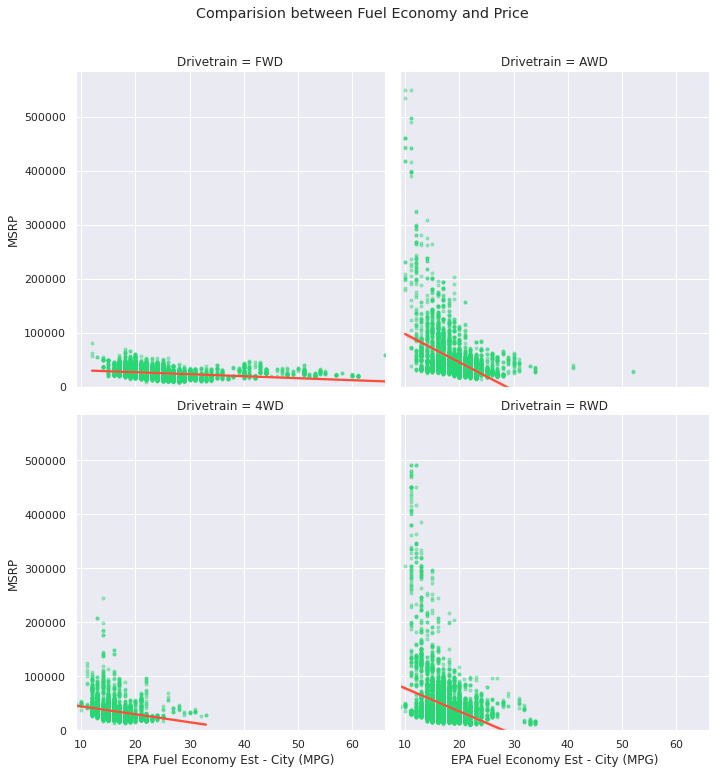

In [12]:
plt.figure(figsize=[10,8])
sns.set(font_scale=1)
lm = sns.lmplot(x = 'EPA Fuel Economy Est - City (MPG)' , 
           y = 'MSRP' ,
           markers= '.',
           col = 'Drivetrain',
           col_wrap=2,
           palette='Blues',
           scatter_kws={'alpha':0.4, 'color':'#29d674'},
           line_kws={'color': '#FF4D3A'},
           data=data)
lm.set(ylim=(0, None))
lm.fig.suptitle('Comparision between Fuel Economy and Price',y=1.05);

Observations:-
 
Negative trend is observed

FWD drivetrain number of cars with more fuel economy with less price of cars is observed

4WD drivetrain vechicles tends to have low fuel economy among all

Car with AWD and RWD with poor fuel economy and price is also on higher side

### Fuel economy of various year

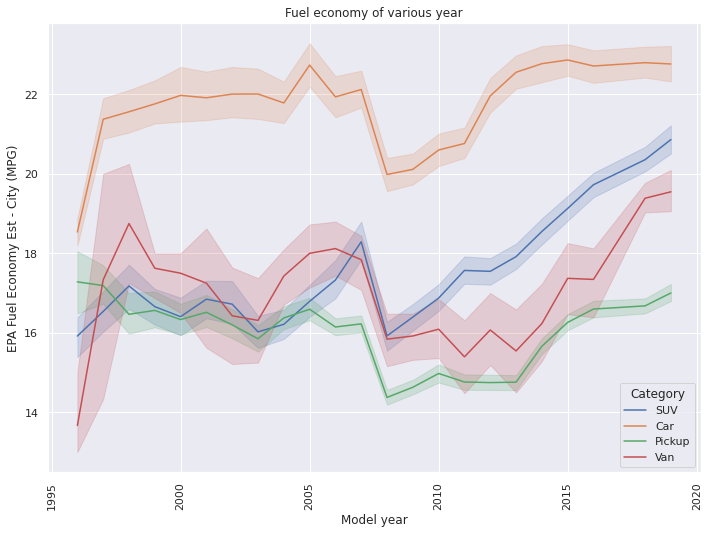

In [13]:
sns.lineplot(x=data['Model year'],y=data['EPA Fuel Economy Est - City (MPG)'],hue=data['Category'],)
plt.xticks(rotation=90)
plt.title('Fuel economy of various year');
plt.savefig('Fuel economy of various year')

Observations:-
 
Car fuel economy is greatest among all other in category

Pickup Fuel economy is declined over the year

SUV Fuel economy has increased gradually over the year 

Van fuel economy was low during last decades ie from 2000 to somehwere around 2017 

### Price to Passanger Capacity

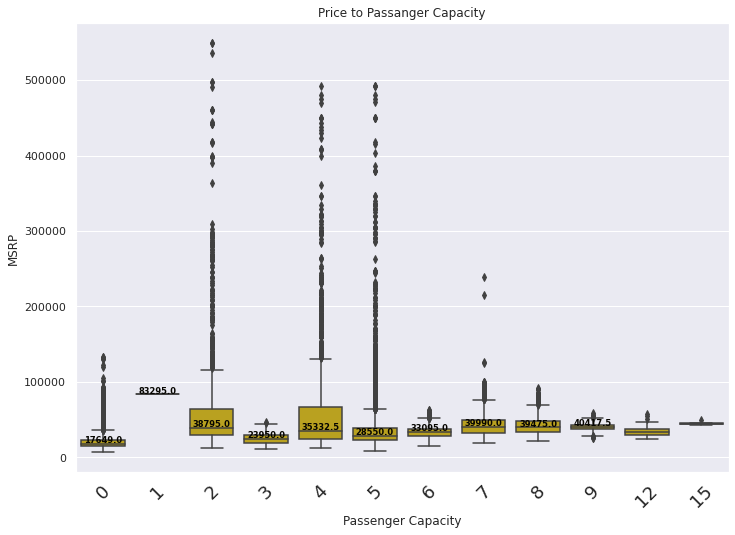

In [14]:
font_settings={'size':18,}
ax=sns.boxplot(x=data['Passenger Capacity'].dropna(),y=data['MSRP'].dropna(),color='#D3B306');
plt.xticks(rotation=45,**font_settings);

plt.title("Price to Passanger Capacity");

medians = data.groupby(['Passenger Capacity'])['MSRP'].median()
vertical_offset = data['MSRP'].median() * 0.05 

for xtick in ax.get_xticks():
    if xtick in  [10,11]:
        pass
    else:
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='x-small',color='#060500',weight='semibold')


Observations:-
 
Passenger Capacity of 2 to 8 occupies most number of vechiles

Passenger Capacity of 2,3 and 4 are at the highest

### Price to Miles Distribution

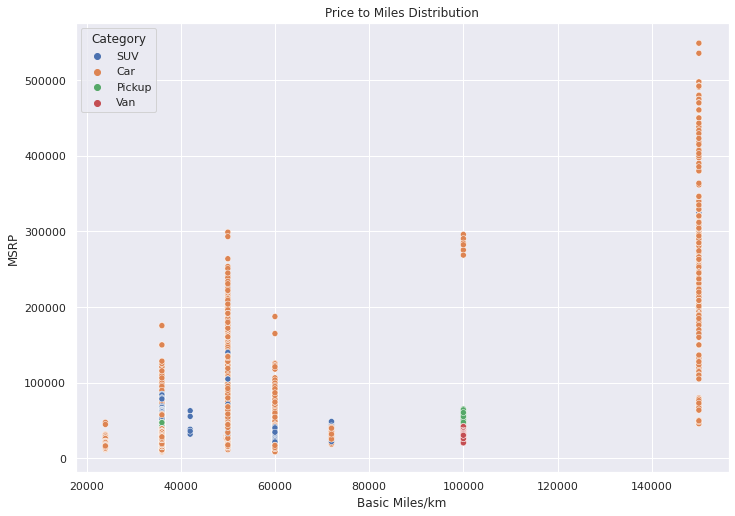

In [15]:
ax=sns.scatterplot(x=data['Basic Miles/km'].dropna(),y=data['MSRP'].dropna(),hue=data['Category'].dropna(),color='#ED481C');
plt.title("Price to Miles Distribution");

Observations:-
 
Car Basic Miles/KM are over 140000

Pickup and Van have 100000 Basci Miles/KM

### Price variation over the years

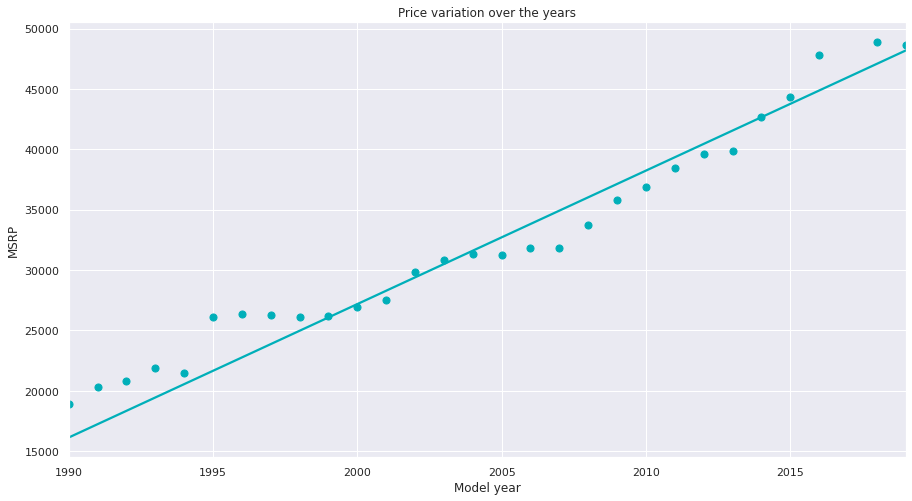

In [16]:
plt.figure(figsize=[15,8])
ax = sns.regplot(x=data['Model year'], y=data['MSRP'], x_bins=5000, ci=None,color='#00afb9')
plt.title("Price variation over the years");
plt.savefig("Price variation over the years")

Observations:-
 
We can see the linear increase in the price over the years

### Car manufacturers price distribution

In [17]:
import matplotlib.cm as cms

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  


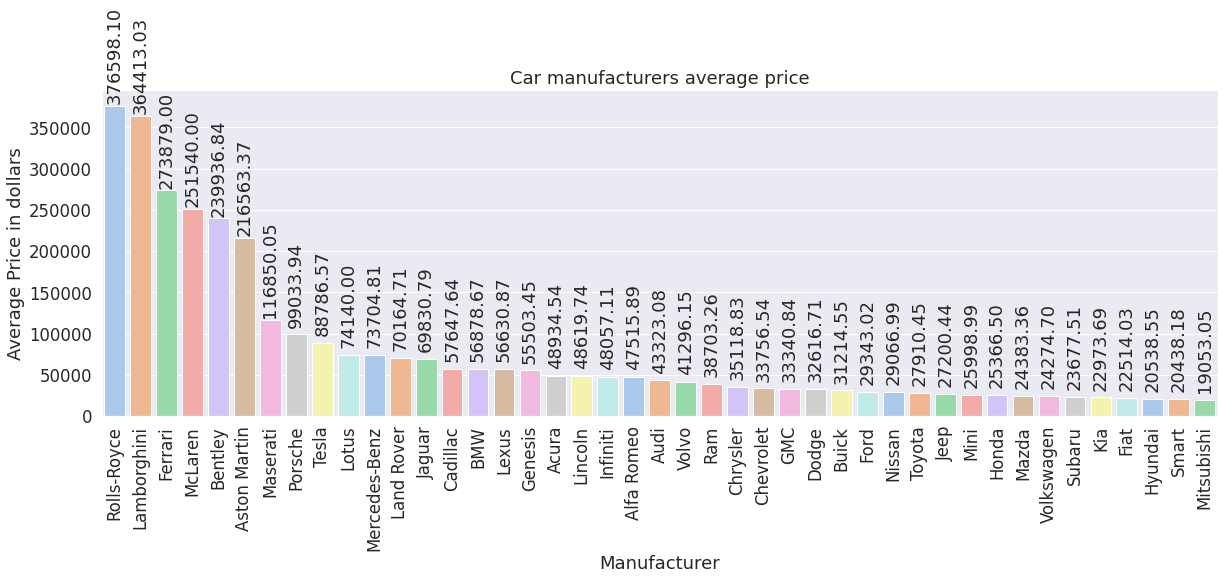

In [18]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,6))
ax = sns.barplot(
    data=data,
    x='Manufacturer',
    y='MSRP',
    order = data.groupby(by = 'Manufacturer')['MSRP'].mean().sort_values( ascending=False).index ,
    palette='pastel',ci=None
);
bar_number(ax,(0, 50),90)
ax.set(ylabel = 'Average Price in dollars')
plt.xticks(rotation=90);
plt.title("Car manufacturers average price");
plt.savefig("Car manufacturers average price",figsize=(50,6));

Observations:-
 
We can see the mean price of car across all manufacrurer

Rolls-Royce has the greatest mean price of car around 376598.10 $

Mitsubishi has the cheapest mean price of car around  19053.05$

###  EPA Fuel Economy Est - City (MPG) Count

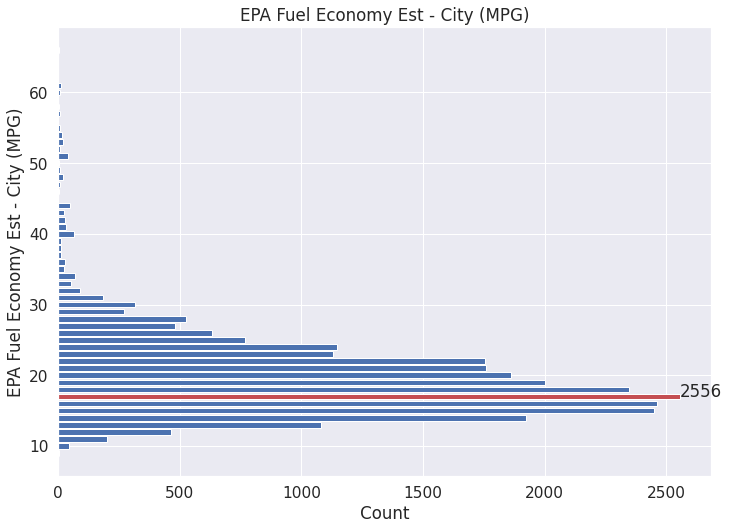

In [19]:
sns.set(font_scale=1.4)
plt.barh(data['EPA Fuel Economy Est - City (MPG)'].value_counts().index,data['EPA Fuel Economy Est - City (MPG)'].value_counts().values)
plt.barh([data['EPA Fuel Economy Est - City (MPG)'].value_counts().index[0]],data['EPA Fuel Economy Est - City (MPG)'].value_counts().max(),color='r')
plt.title('EPA Fuel Economy Est - City (MPG)')
plt.xlabel('Count')
plt.ylabel('EPA Fuel Economy Est - City (MPG)')

for index, value in zip(data['EPA Fuel Economy Est - City (MPG)'].value_counts().index,data['EPA Fuel Economy Est - City (MPG)'].value_counts().values):
    if value>2500:
        plt.text(value, index, str(value))


Observations:-
 
2002 number of Cars gives the average which is in 19 MPG

2348 number of Cars gives the average which is in 18 MPG

2556 number of Cars gives the average which is in 17 MPG -  Highest marked in red

2453 number of Cars gives the average which is in 16 MPG

2451 number of Cars gives the average which is in 15 MPG

### Engine Count 

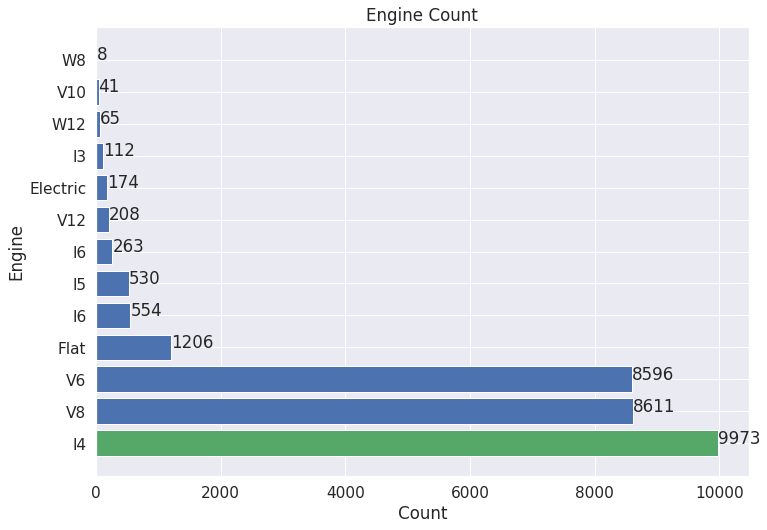

In [20]:
plt.barh(data['Engine'].value_counts().index,data['Engine'].value_counts().values)
plt.barh([data['Engine'].value_counts().index[0]],data['Engine'].value_counts().max(),color='g')
plt.title('Engine Count')
plt.xlabel('Count')
plt.ylabel('Engine')
for index, value in zip(data['Engine'].value_counts().index,data['Engine'].value_counts().values):
    plt.text(value, index, str(value))

plt.savefig("Engine count")

Observations:-
 
I4 engine has the higest count.

W8 engine has the lowest count.

### Fuel Economy with Engine comparied with Drivetrain

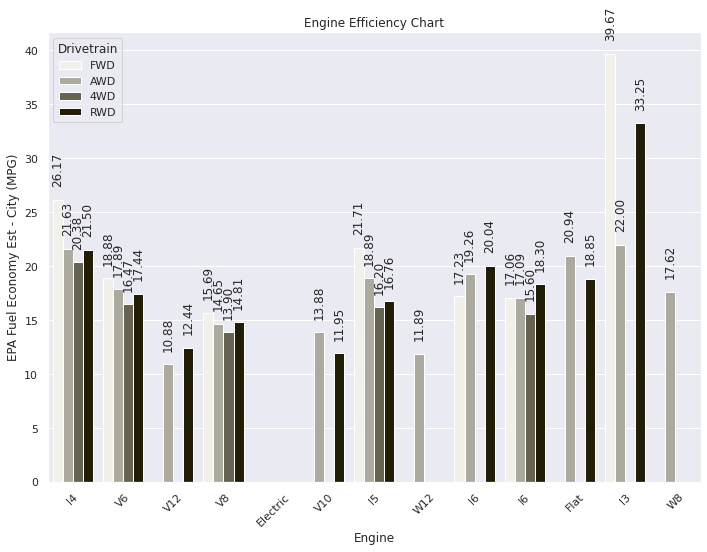

In [21]:
sns.set(font_scale=1)
ax=sns.barplot(x=data['Engine'],y=data['EPA Fuel Economy Est - City (MPG)'],hue=data['Drivetrain'],ci=None,color='#252003',estimator=np.mean)
plt.xticks(rotation=45);
plt.title("Engine Efficiency Chart");
bar_number(ax,(0, 30),90)

Observations:-

I3 engine with FWD gives the highest of Fuel Economy - 39.67 MPG

V12 engine with AWD gives the lowest Fuel Economy - 10.88 MPG

### Terrian Efficiency Chart

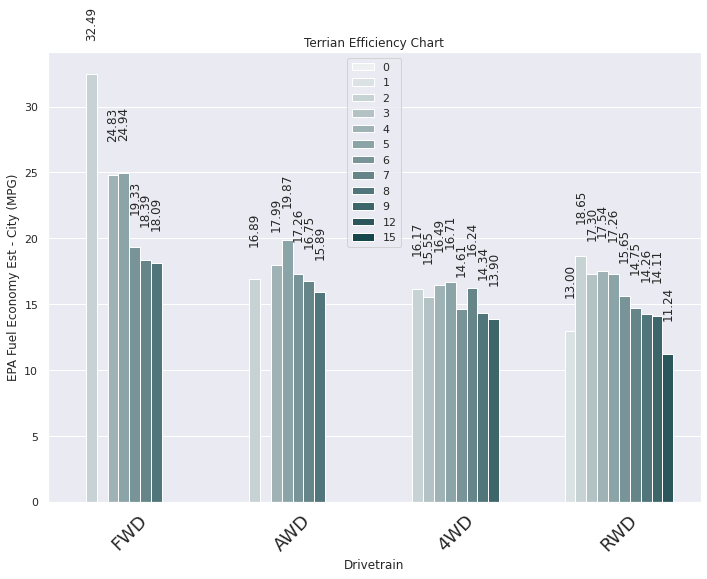

In [22]:
sns.set(font_scale=1)
font_settings={'size':18,}
ax=sns.barplot(x=data['Drivetrain'].dropna(),y=data['EPA Fuel Economy Est - City (MPG)'].dropna(),ci=None,hue=data['Passenger Capacity'],color='#0D4E56',)
plt.xticks(rotation=45,**font_settings);
plt.legend(loc='upper center',)
plt.title("Terrian Efficiency Chart");
bar_number(ax,(0, 50),90)


Observations:-

RWD with 12 Transmission  give lowest fuel economy -11.24 MPG

FWD with 3 Transmission gives highest fuel economy-32.49 MPG

### Engine Efficiency Chart with Drive Train

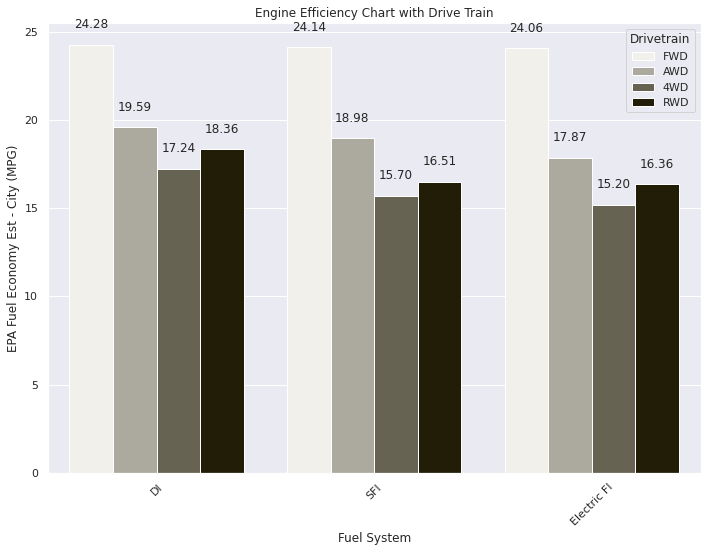

In [23]:
ax=sns.barplot(x=data['Fuel System'],y=data['EPA Fuel Economy Est - City (MPG)'],ci=None,hue=data['Drivetrain'],color='#252003')
plt.xticks(rotation=45);
plt.title("Engine Efficiency Chart with Drive Train");
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points',)


Observations:-

Fuel Systems DI SFI and Electic FI  gives almost same and greatest fuel economy in FWD 

Fuel system SFI Electric FI gives the lowest fuel economy in 4WD

### Fuel Economy Vs Transmission Desciption

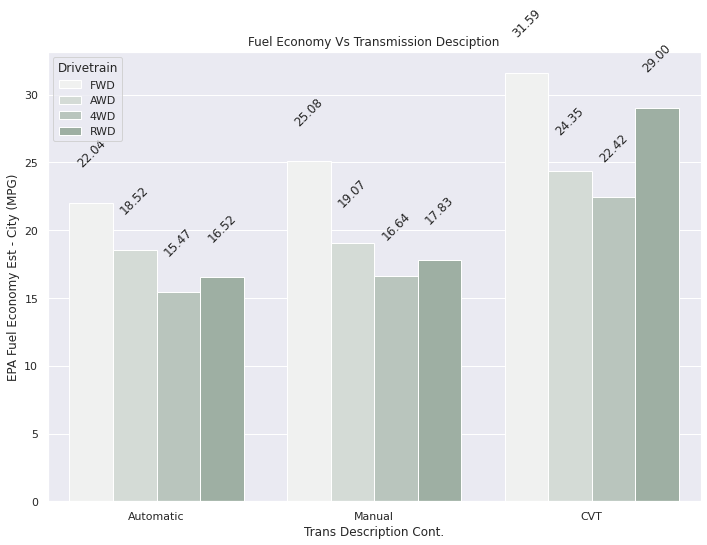

In [24]:
ax=sns.barplot(x=data['Trans Description Cont.'],y=data['EPA Fuel Economy Est - City (MPG)'],ci=None,hue=data['Drivetrain'],color='#9BB2A2')
plt.title("Fuel Economy Vs Transmission Desciption");
bar_number(ax,(0, 50),45)


Observations:-

CVT in manual gives fuel economy of 31.59 MPG

CVT gives better fuel economy as compared to another transmission

Automatic with FWD gives the lowest fuel economy of all 

### Fuel Economy Efficiency with Tranmission type

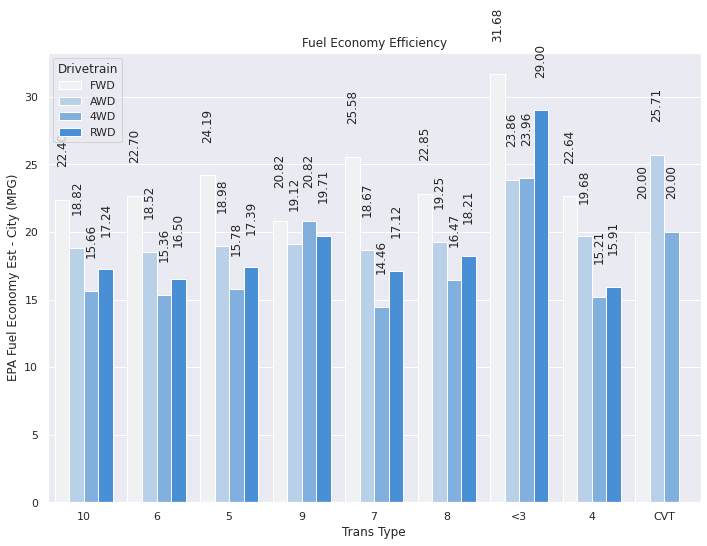

In [25]:
ax=sns.barplot(x=data['Trans Type'],y=data['EPA Fuel Economy Est - City (MPG)'],ci=None,hue=data['Drivetrain'],color='#328FEC')
plt.title("Fuel Economy Efficiency");
bar_number(ax,(0, 50),90)

Observations:-

3 or less transmission (gear) with FWD gives the good fuel economy - 31.68 MPG

Higher the transmission is lower the fuel economy

### Barplot between Price And Drivetrain And Category types

No handles with labels found to put in legend.


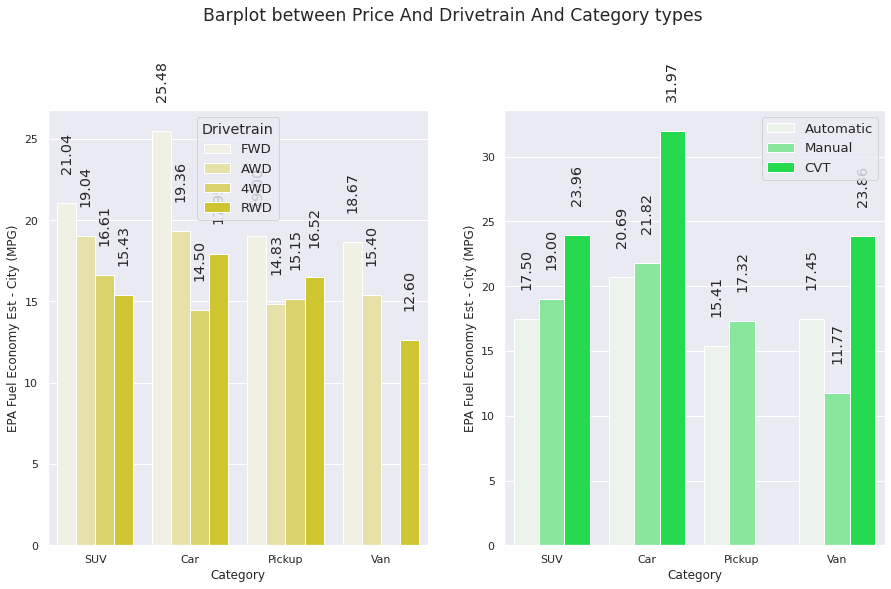

In [26]:
sns.color_palette("husl", 9)
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,8))
sns.set(font_scale=1.20)
ax1=sns.barplot(ax=ax[0],x=data['Category'],y=data['EPA Fuel Economy Est - City (MPG)'],ci=None,hue=data['Drivetrain'],color='#E9DC16')

plt.legend(loc='upper right');
bar_number(ax1,(0, 50),90)

ax2=sns.barplot(ax=ax[1],x=data['Category'],y=data['EPA Fuel Economy Est - City (MPG)'],ci=None,hue=data['Trans Description Cont.'],color='#07F83F')

plt.legend(loc='upper right');
bar_number(ax2,(0, 50),90)

fig.suptitle('Barplot between Price And Drivetrain And Category types',y=1.06);

Observations:-

Car with FWD and CVT gives the highest Fuel economy.

Vans with RWD and Manual gives the lowest Fuel economy

In [27]:
df=pd.DataFrame(data['EPA Fuel Economy Est - City (MPG)'],data['Model year'],)
ls=list(data['Category'])
df['Category']=ls
ls1=list(data['Model year'])
df['Model year']=ls1
df.dropna();

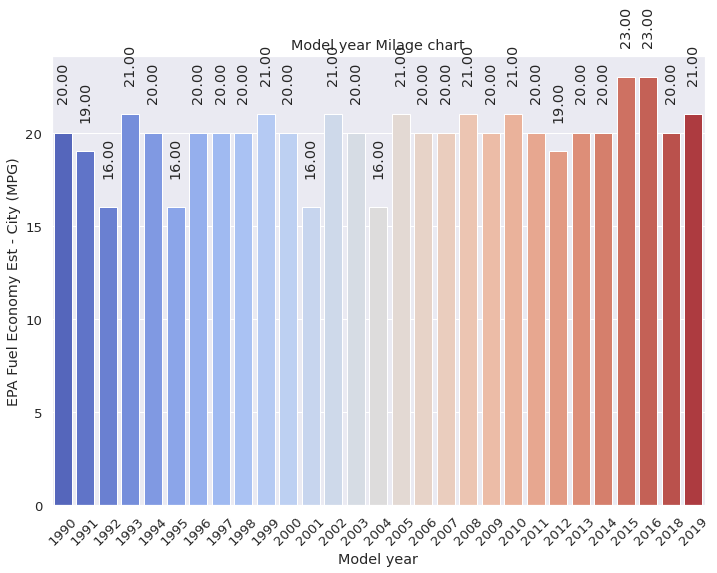

In [28]:
ax=sns.barplot(x=df.index,y=df['EPA Fuel Economy Est - City (MPG)'],
ci=None,palette=('coolwarm'),)
plt.title("Model year Milage chart");
plt.xticks(rotation=45)
bar_number(ax,(0, 50),90)

Observations:-

The average Fuel Economy has been consistent 3 decades

These years the average Fuel Economy has gone down 1991,1994,2001,2004

### Torque count with Engine along with Fuel System and Category

No handles with labels found to put in legend.


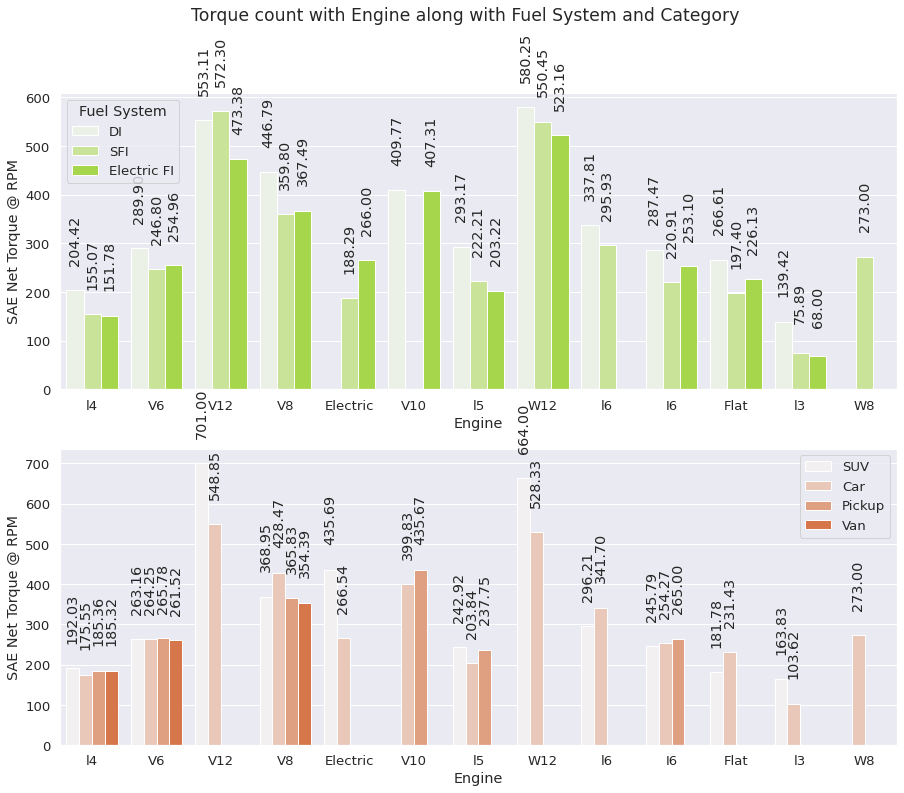

In [29]:
fig, ax =plt.subplots(2,1,figsize=(15,12))
ax1=sns.barplot(x=data['Engine'],y=data['SAE Net Torque @ RPM'],ci=None,hue=data['Fuel System'],ax=ax[0],color='#ADED34');
plt.legend(loc='upper right');
bar_number(ax1,(0, 50),90);

ax2=sns.barplot(x=data['Engine'],y=data['SAE Net Torque @ RPM'],ci=None,hue=data['Category'],ax=ax[1],color='#ED6F34');
plt.legend(loc='upper right');
bar_number(ax2,(0, 50),90);
fig.suptitle('Torque count with Engine along with Fuel System and Category');

Observation:-

Torque generated by V12 in DI fuel system is greatest

Torque generated in SUV by V12 is greatest

In certain the V12 engine is powerful engine but fuel economy is very low

###  Horse power count to Engine along with Fuel Sysytem and Category

No handles with labels found to put in legend.


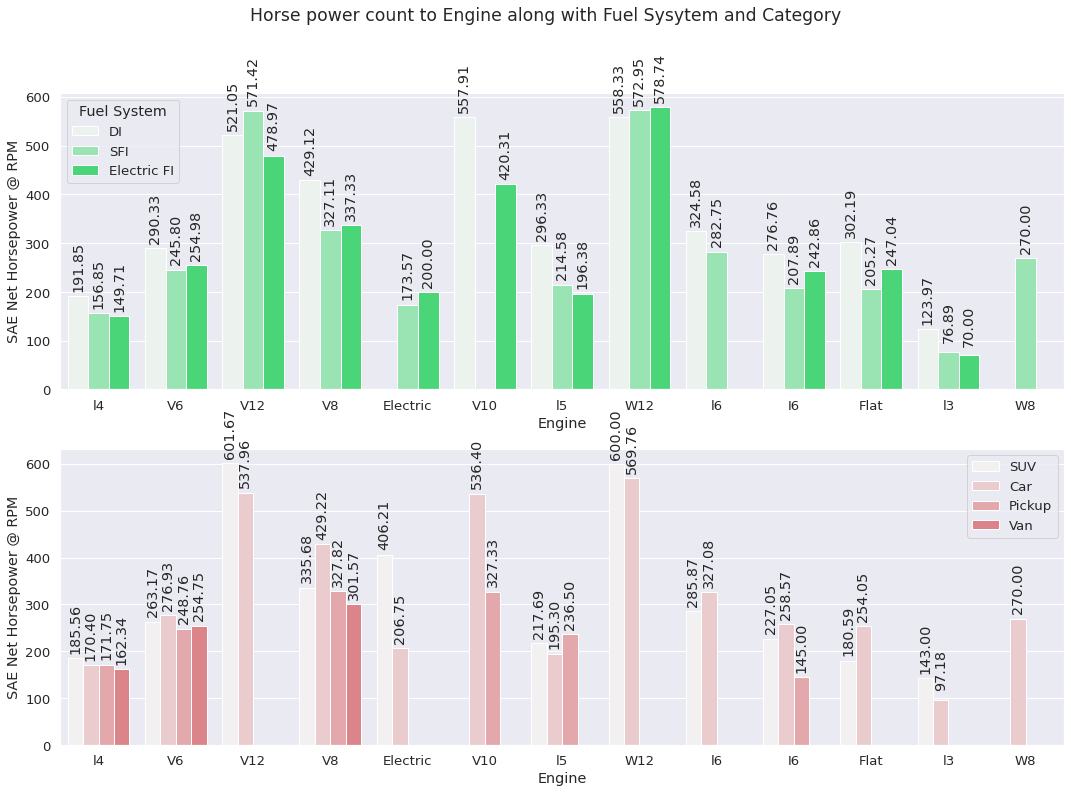

In [30]:
fig, ax =plt.subplots(2,1,figsize=(18,12))
ax_=sns.barplot(ax=ax[0],x=data['Engine'],y=data['SAE Net Horsepower @ RPM'],ci=None,hue=data['Fuel System'],color='#32EC70')
plt.legend(loc='upper right')
bar_number(ax_,(0, 30),90)

ax1=sns.barplot(ax=ax[1],x=data['Engine'],y=data['SAE Net Horsepower @ RPM'],ci=None,hue=data['Category'],color='#EA757C')
plt.legend(loc='upper right')
bar_number(ax1,(0, 30),90)
fig.suptitle('Horse power count to Engine along with Fuel Sysytem and Category');

Observations:-

Net Horsepower is produced by V12 and W12 engine with SFI fuel system is largest which is about 571-572 @RPM

Net Horsepower is delivered in SUV by V12 and W12 is 601-600 @RPM

SUV have more torque and horsepower in comparision to other but with less than average fuel economy

### Engine Price with different  Transmission

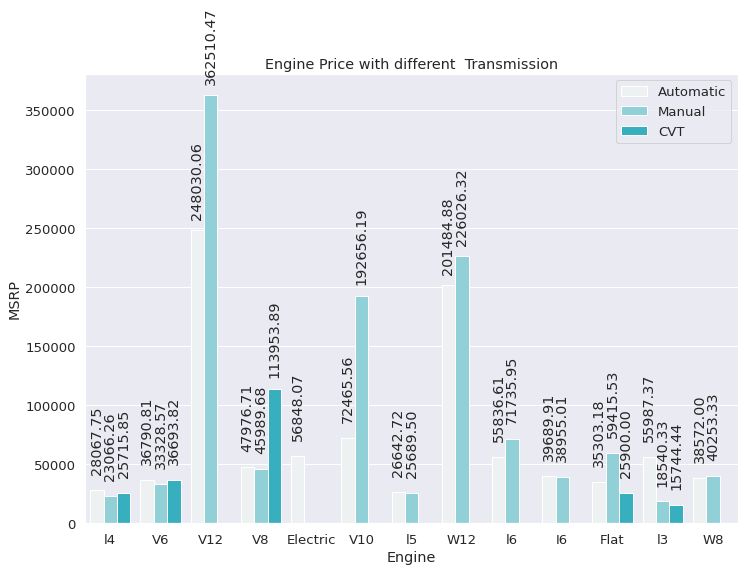

In [31]:
plt.figure()
ax=sns.barplot(x=data['Engine'],y=data['MSRP'],ci=None,hue=data['Trans Description Cont.'],color='#20C0D5')
plt.title(" Chart");
plt.legend(loc='upper right')
bar_number(ax,(0, 50),90)
plt.title("Engine Price with different  Transmission");

Observations:-

Vechiles price of V12 enigne with Automatic Transmission is 248030.06 which is costiler side.

Vechile price of V12 enigne with Manual Transmission is 362510.47 which is costiler side.

Vechile price of I3 enigne with CVT Transmission is 15744.44 which is cheaper side.

Vechile price of I3 enigne with Manual Transmission is 55987.37 which is costiler side

### Spread of Fuel Economy for Curb weigh , Displacement and Fuel tank

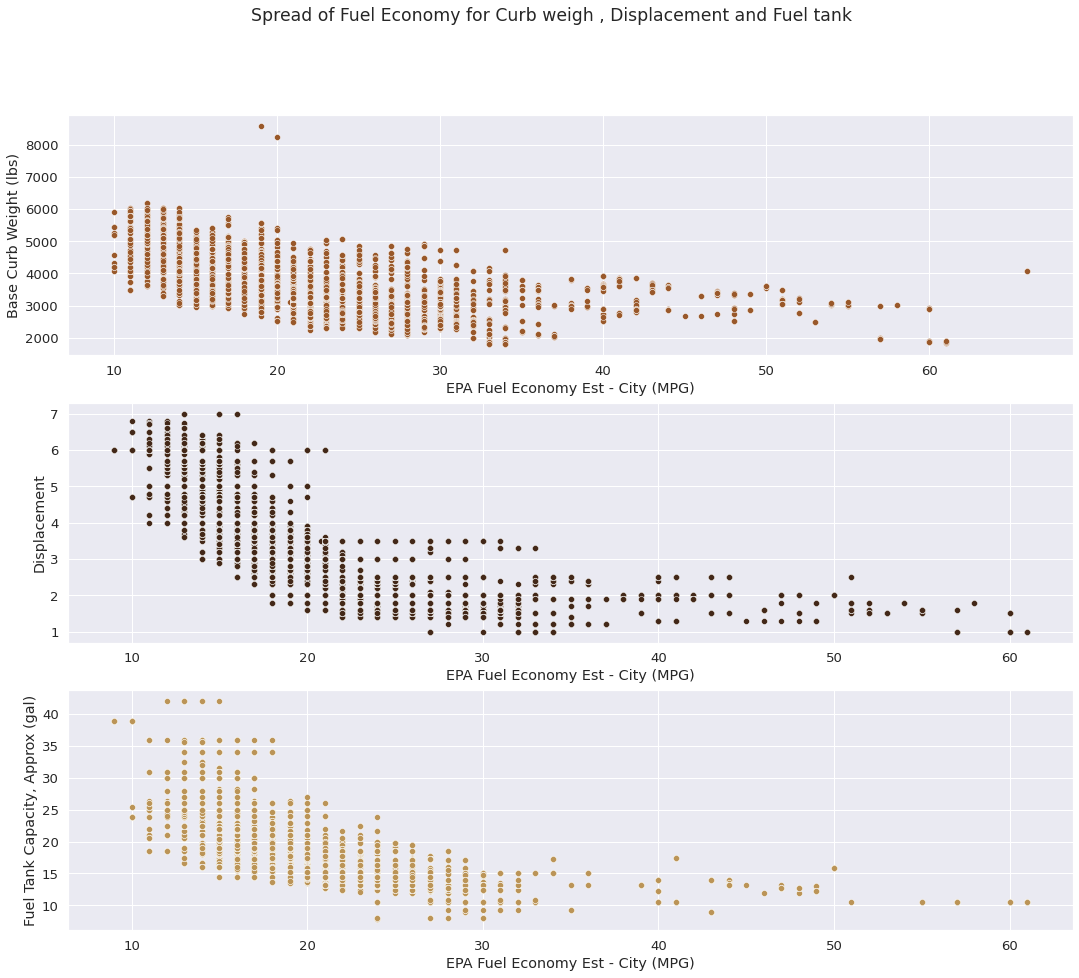

In [32]:
fig, ax =plt.subplots(3,1,figsize=(18,15)) 
sns.scatterplot(ax=ax[0],x=data['EPA Fuel Economy Est - City (MPG)'],y=data['Base Curb Weight (lbs)'],color='#99582a');
sns.scatterplot(ax=ax[1],x=data['EPA Fuel Economy Est - City (MPG)'],y=data['Displacement'],color='#432818');
sns.scatterplot(ax=ax[2],x=data['EPA Fuel Economy Est - City (MPG)'],y=data['Fuel Tank Capacity, Approx (gal)'],color='#bb9457');

fig.suptitle('Spread of Fuel Economy for Curb weigh , Displacement and Fuel tank ',);

### Distribution of the Horse power and Torque with respect to Displacement

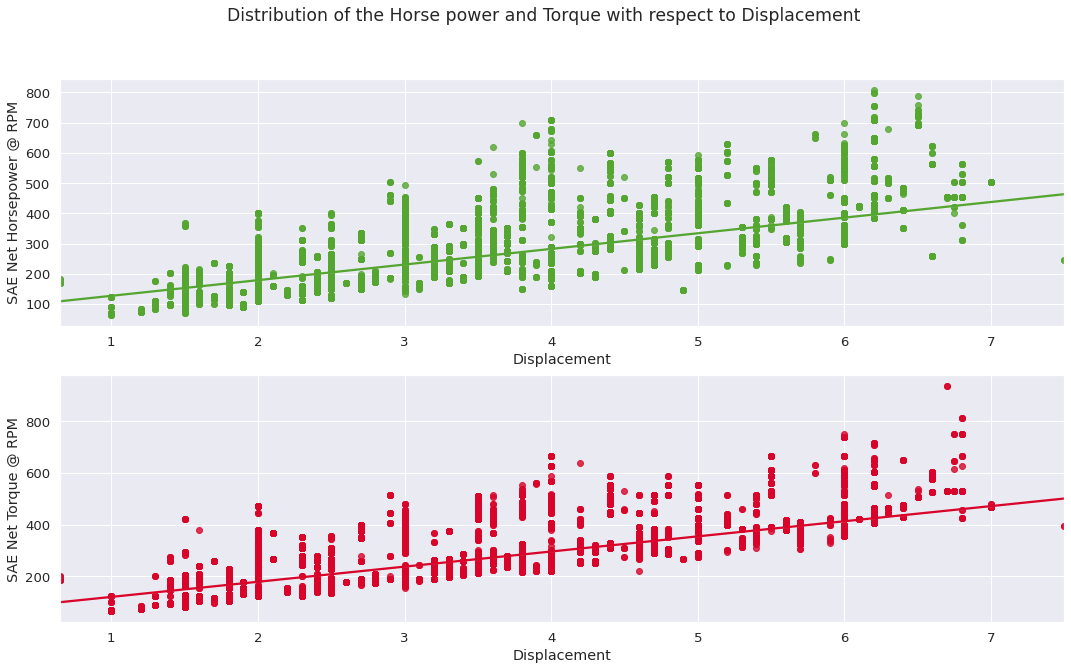

In [33]:
fig,ax=plt.subplots(2,1, figsize=(18,10)) 
sns.regplot(ax=ax[0],y=data['SAE Net Horsepower @ RPM'],x=data['Displacement'],color='#55a630');
sns.regplot(ax=ax[1],y=data['SAE Net Torque @ RPM'],x=data['Displacement'],color='#d90429');
plt.suptitle("Distribution of the Horse power and Torque with respect to Displacement ");
plt.show()

Observations:-

Net Torque and Net Horsepower increases as increase in number of Displacement

### Count of Manufacturer

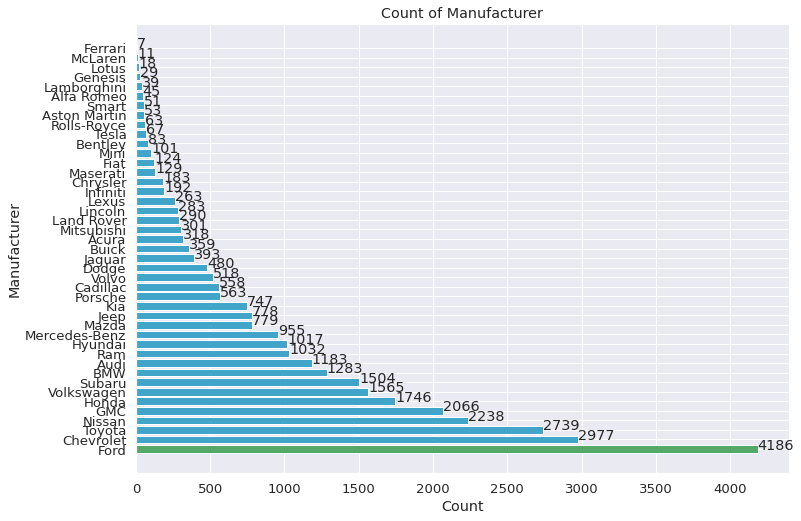

In [34]:
plt.barh(data['Manufacturer'].value_counts().index,data['Manufacturer'].value_counts().values,color='#40a5c9',)
plt.barh([data['Manufacturer'].value_counts().index[0]],data['Manufacturer'].value_counts().max(),color='g')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
for index, value in zip(data['Manufacturer'].value_counts().index,data['Manufacturer'].value_counts().values):
    plt.text(value, index, str(value))

plt.title("Count of Manufacturer");
plt.savefig("Cars produced by manufacture")

Observation:-

Ferrari has produced the lowest quanity vechiles -7

Ford has produced the largest quanity vechiles-4186 

In this we can observe the count of vechiles produced each manufacture.

### Count of Category of Cars along the years

<Figure size 842.4x595.44 with 0 Axes>

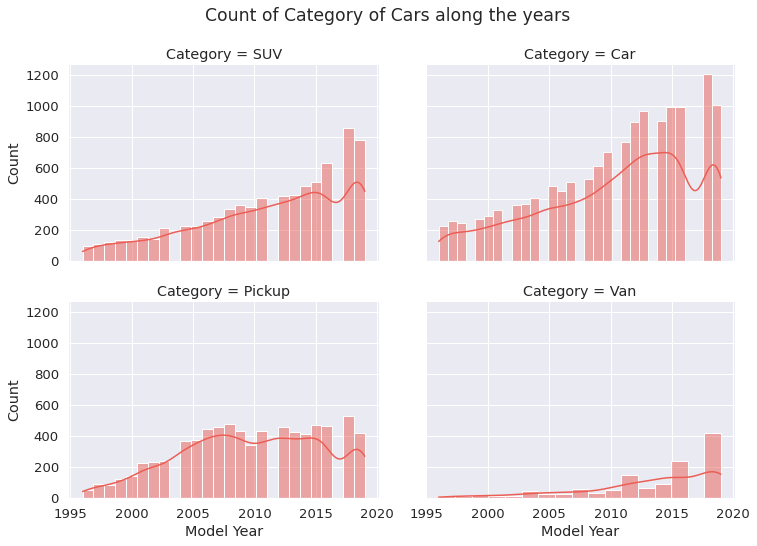

In [35]:
plt.figure();
ax = sns.FacetGrid(data, col="Category",  height=3.5,col_wrap=2,aspect=1.50,);
ax.map_dataframe(sns.histplot, x="Model year",kde=True,color='#eb5e55');
ax.set_axis_labels("Model Year", "Count");
plt.suptitle("Count of Category of Cars along the years",y=1.05);

Observations:-

Production of Van is not significantly increase.

Production of Pickup is similar to last 15 years. Increase in production of pickup is not observed

Prodution of Car and SUV is linear. Production growth over 25 years is increasing continuously

### Boolean Values graphical representation

In [36]:
dict_data={'Present':[],'Absent':[]}
bool_cols=['Air Bag-Frontal-Driver', 'Air Bag-Frontal-Passenger',
       'Air Bag-Passenger Switch (On/Off)', 'Air Bag-Side Body-Front',
       'Air Bag-Side Body-Rear', 'Air Bag-Side Head-Front',
       'Air Bag-Side Head-Rear', 'Brakes-ABS', 'Child Safety Rear Door Locks',
       'Daytime Running Lights', 'Traction Control', 'Night Vision',
       'Rollover Protection Bars', 'Fog Lamps', 'Parking Aid',
       'Tire Pressure Monitor', 'Back-Up Camera', 'Stability Control']
for i in bool_cols:
       tt=data[i].value_counts()
       dict_data['Present'].append(tt[1])
       dict_data['Absent'].append(tt[0])

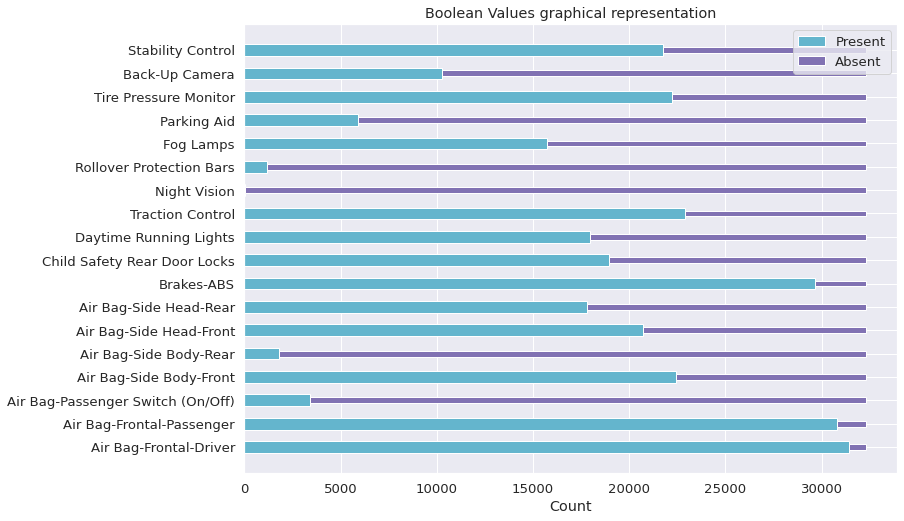

In [37]:
ax=plt.barh(y=np.arange(len(bool_cols)),width=dict_data['Present'],color='c',height=0.5)
ax1=plt.barh(y=np.arange(len(bool_cols)),width=dict_data['Absent'],color='m',height=0.25,left=dict_data['Present'])
plt.yticks(ticks=np.arange(len(bool_cols)),labels=bool_cols)
plt.title("Boolean Values graphical representation")
plt.xlabel('Count')
plt.legend([ax,ax1],['Present','Absent'])
plt.show()

Observations: -

Night Vision is not present in any car.

Most cars have Frontal Driver and Passenger Airbags.


